**Assessment 4** Taniya Hussain 21BKT0083

*Task 1: Load the dataset*

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [11]:
df=pd.read_csv("winequality_red.csv")
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

*Task 2:Data preprocessing including visualization*

In [12]:
df.shape

(1599, 12)

In [13]:
df.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual_sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free_sulfur_dioxide  -0.069408 -0.050656  
total_sulfur_dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [16]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

there are no null values in the dataset so we dont have to use mean or median for inserting values into the dataset

In [17]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [18]:
df.corr().quality.sort_values(ascending =False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

<ipython-input-19-cc0e16fd78a8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

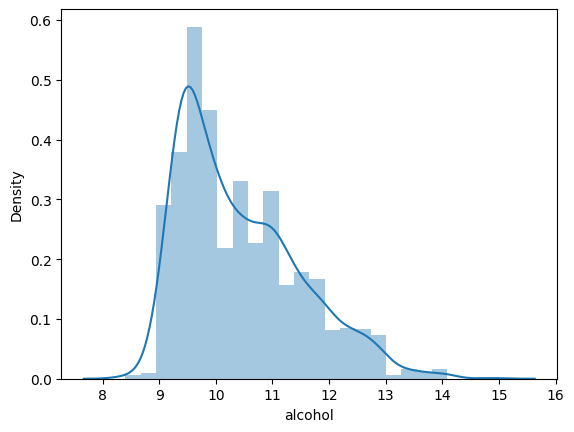

In [19]:
sns.distplot(df.alcohol)

<ipython-input-21-8b271c44c149>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.sulphates)


<Axes: xlabel='sulphates', ylabel='Density'>

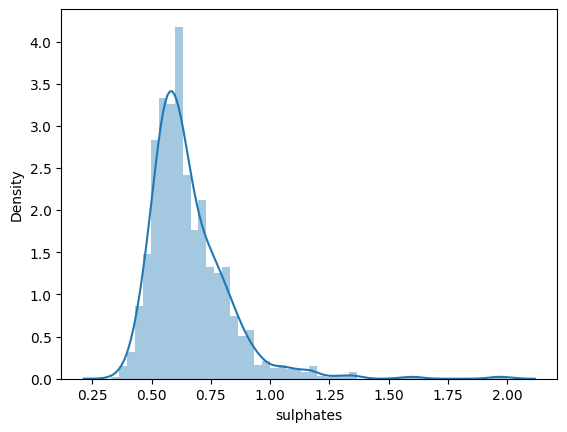

In [21]:
sns.distplot(df.sulphates)

<ipython-input-23-257d94f835ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.citric_acid)


<Axes: xlabel='citric_acid', ylabel='Density'>

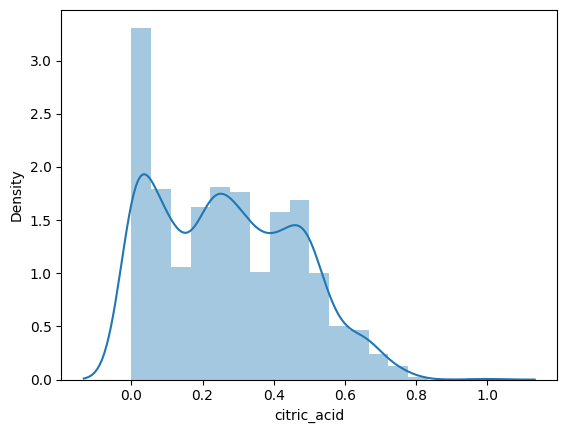

In [23]:
sns.distplot(df.citric_acid)

<Axes: ylabel='fixed_acidity'>

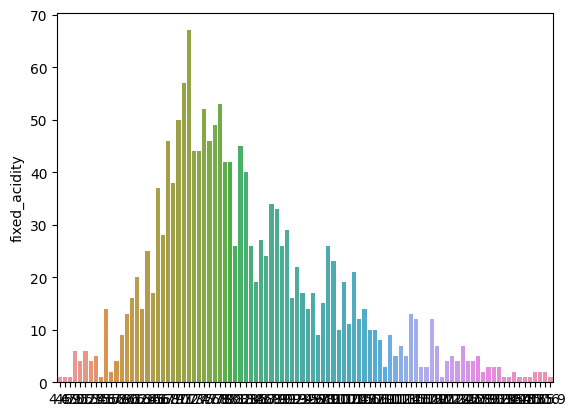

In [25]:
sns.barplot(x =df.fixed_acidity.value_counts().index,y =df.fixed_acidity.value_counts() )

<ipython-input-27-432f957fe75c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.residual_sugar)


<Axes: xlabel='residual_sugar', ylabel='Density'>

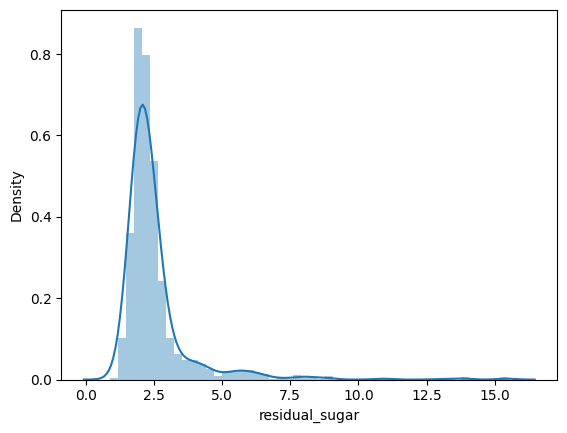

In [27]:
sns.distplot(df.residual_sugar)

<Axes: ylabel='free_sulfur_dioxide'>

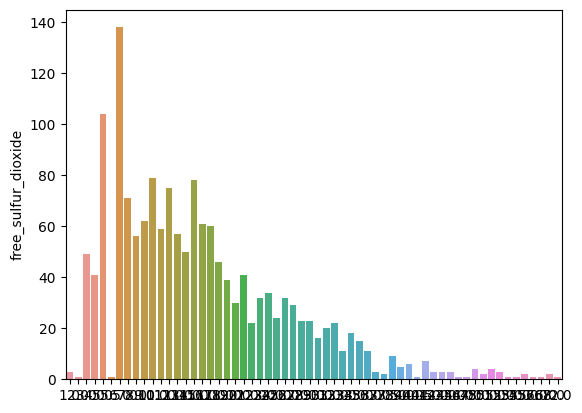

In [29]:
sns.barplot(x =df.free_sulfur_dioxide.value_counts().index,y =df.free_sulfur_dioxide.value_counts() )

<ipython-input-31-d3a19b159d9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.pH)


<Axes: xlabel='pH', ylabel='Density'>

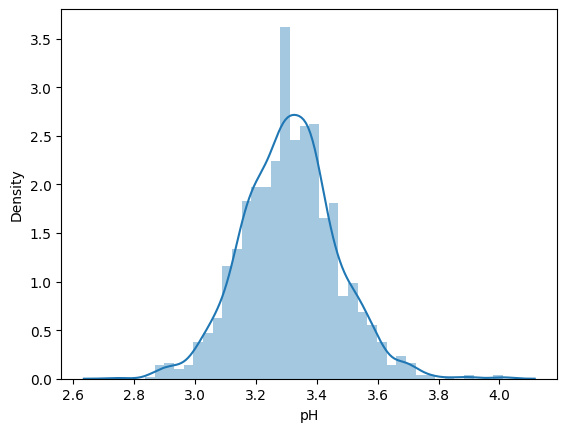

In [31]:
sns.distplot(df.pH)

<ipython-input-33-ce49f00db6f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

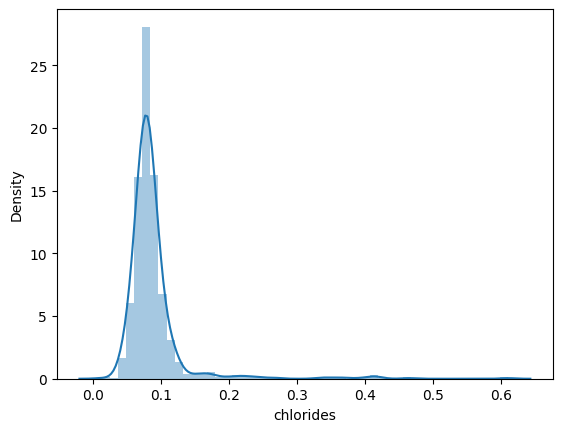

In [33]:
sns.distplot(df.chlorides)

<ipython-input-35-d7414a6caaf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.density)


<Axes: xlabel='density', ylabel='Density'>

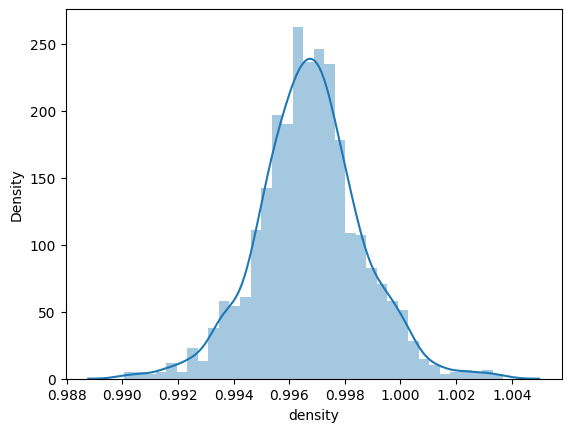

In [35]:
sns.distplot(df.density)

<ipython-input-37-8d1520064424>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.total_sulfur_dioxide)


<Axes: xlabel='total_sulfur_dioxide', ylabel='Density'>

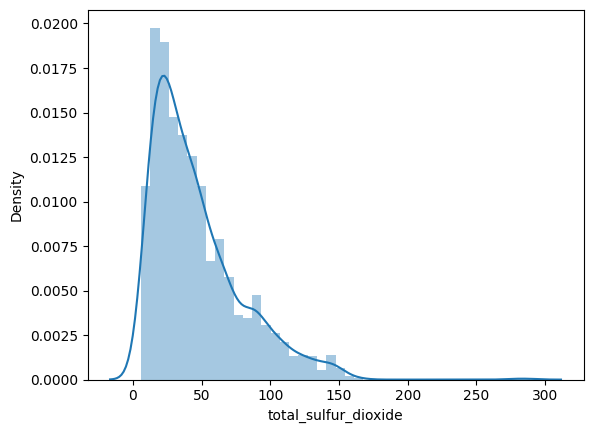

In [37]:
sns.distplot(df.total_sulfur_dioxide)

<ipython-input-38-ef20b748abeb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.volatile_acidity)


<Axes: xlabel='volatile_acidity', ylabel='Density'>

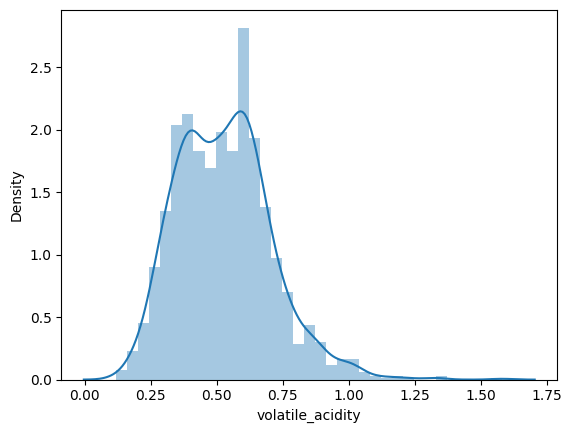

In [38]:
sns.distplot(df.volatile_acidity)

<Axes: xlabel='alcohol', ylabel='quality'>

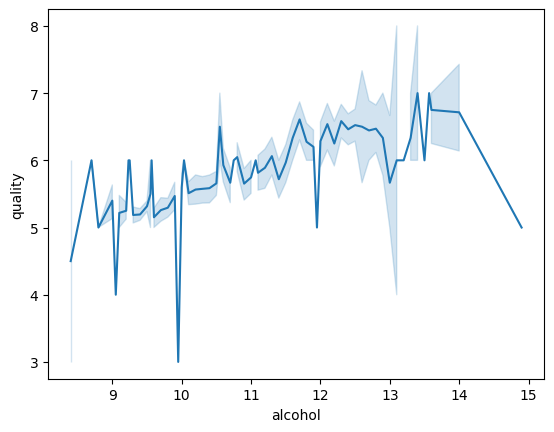

In [39]:
sns.lineplot(x = df.alcohol,y=df.quality)

<Axes: xlabel='sulphates', ylabel='alcohol'>

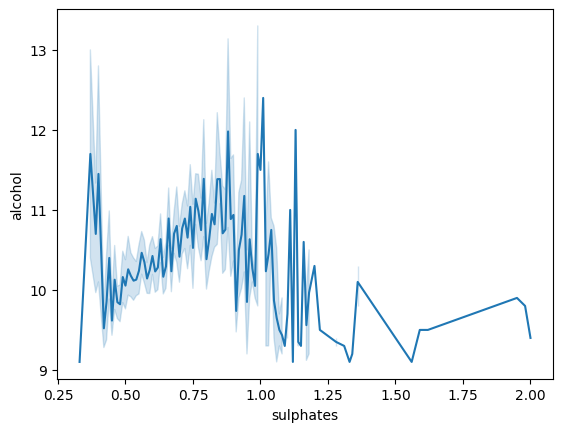

In [42]:
sns.lineplot(x = df.sulphates,y=df.alcohol)

<Axes: xlabel='sulphates', ylabel='quality'>

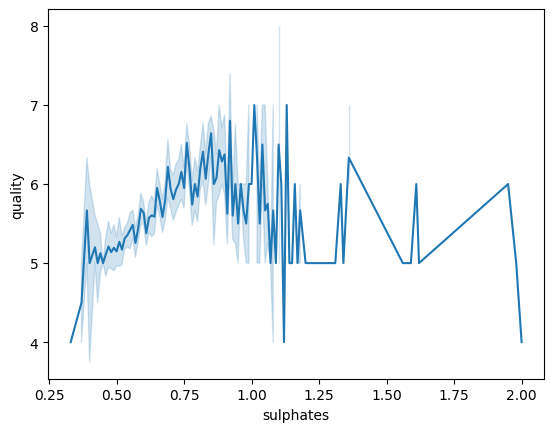

In [43]:
sns.lineplot(x = df.sulphates,y=df.quality)

<Axes: xlabel='citric_acid', ylabel='alcohol'>

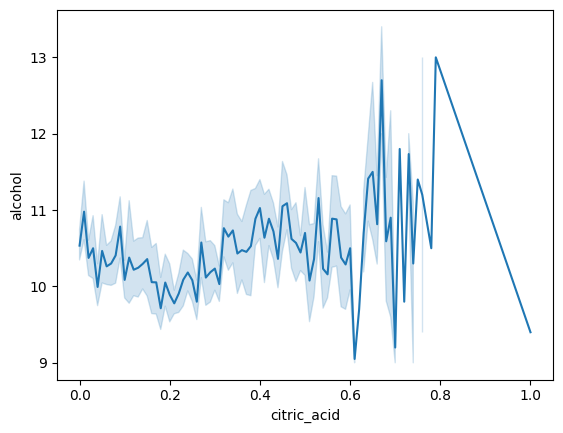

In [44]:
sns.lineplot(x = df.citric_acid,y=df.alcohol)

<Axes: xlabel='citric_acid', ylabel='quality'>

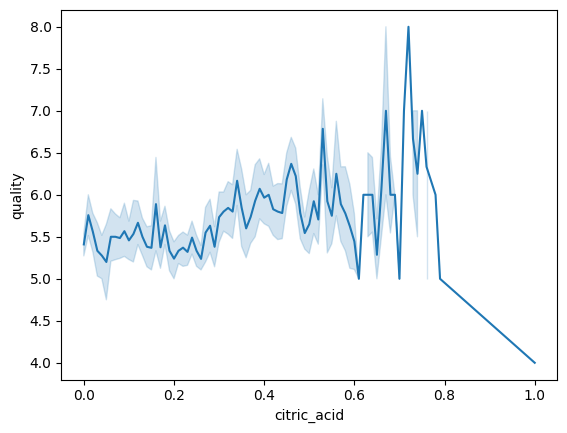

In [45]:
sns.lineplot(x = df.citric_acid,y=df.quality)

<Axes: xlabel='fixed_acidity', ylabel='alcohol'>

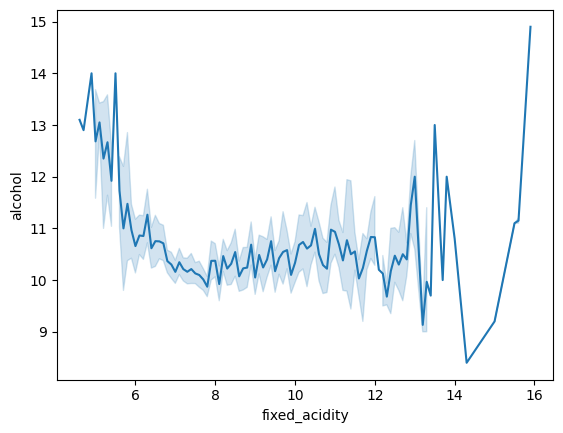

In [47]:
sns.lineplot(x = df.fixed_acidity,y=df.alcohol)

<Axes: xlabel='fixed_acidity', ylabel='alcohol'>

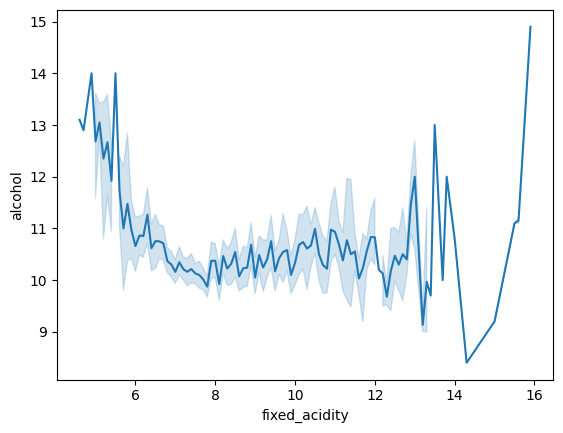

In [49]:
sns.lineplot(x = df.fixed_acidity,y=df.alcohol)

<Axes: xlabel='fixed_acidity', ylabel='quality'>

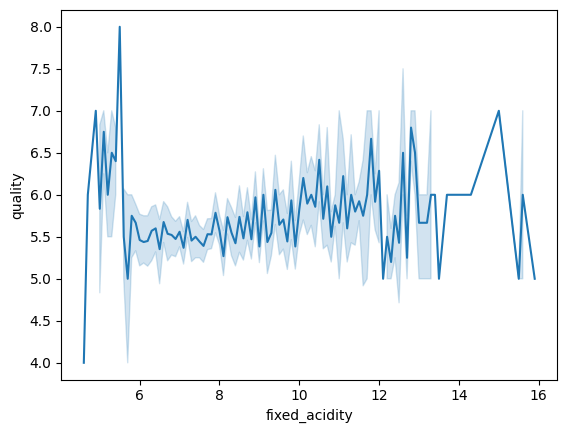

In [50]:
sns.lineplot(x = df.fixed_acidity,y=df.quality)

<Axes: xlabel='residual_sugar', ylabel='alcohol'>

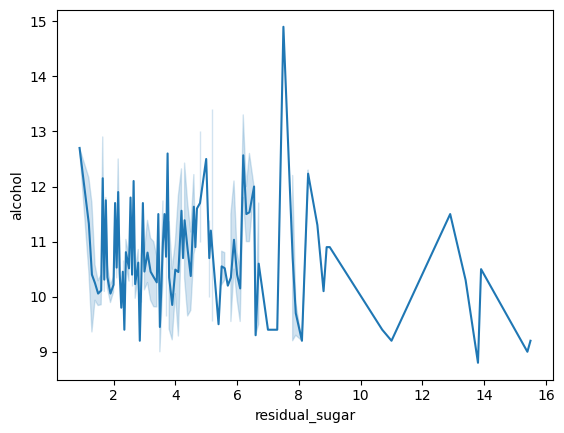

In [51]:
sns.lineplot(x = df.residual_sugar,y=df.alcohol)

<Axes: xlabel='residual_sugar', ylabel='quality'>

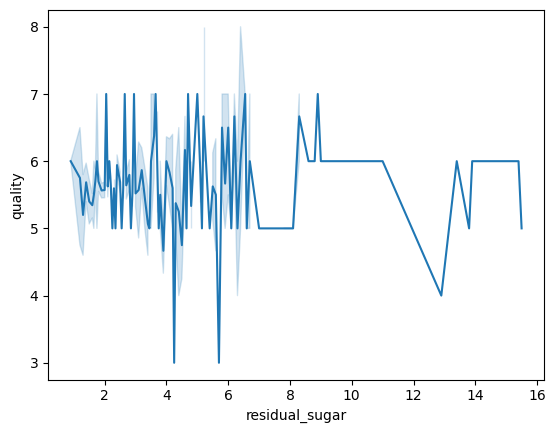

In [52]:
sns.lineplot(x = df.residual_sugar,y=df.quality)

<Axes: xlabel='free_sulfur_dioxide', ylabel='alcohol'>

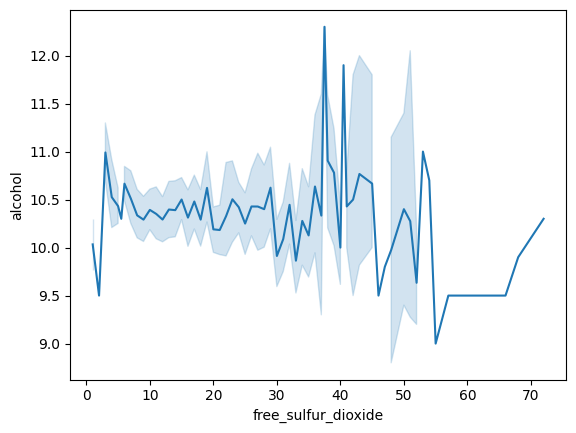

In [54]:
sns.lineplot(x = df.free_sulfur_dioxide,y=df.alcohol)

<Axes: xlabel='free_sulfur_dioxide', ylabel='quality'>

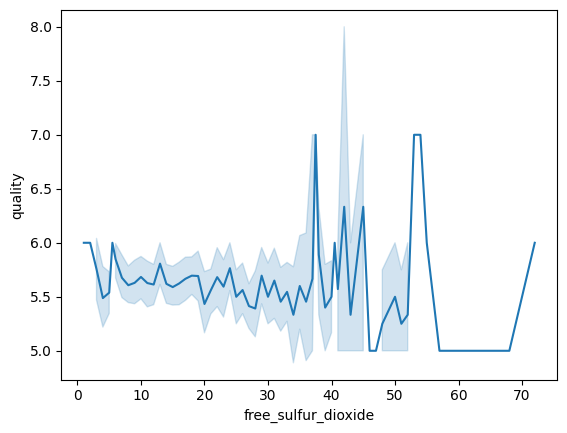

In [55]:
sns.lineplot(x = df.free_sulfur_dioxide,y=df.quality)

<Axes: xlabel='pH', ylabel='alcohol'>

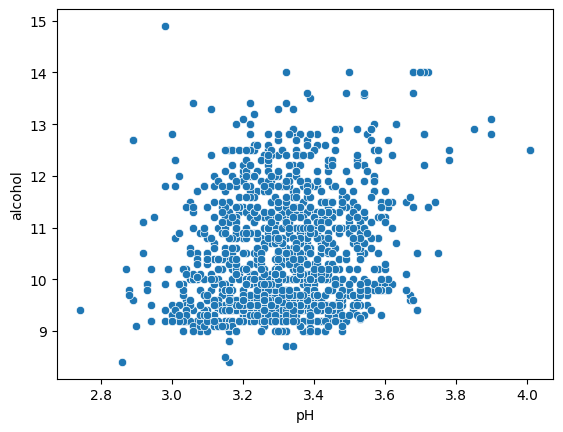

In [58]:
sns.scatterplot(x = df.pH,y=df.alcohol)

<Axes: xlabel='pH', ylabel='quality'>

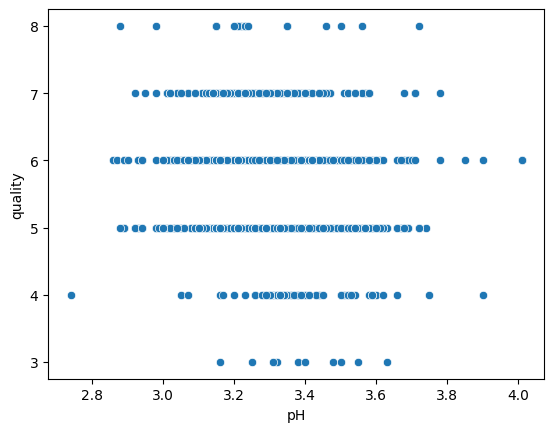

In [59]:
sns.scatterplot(x = df.pH,y=df.quality)

<Axes: xlabel='chlorides', ylabel='alcohol'>

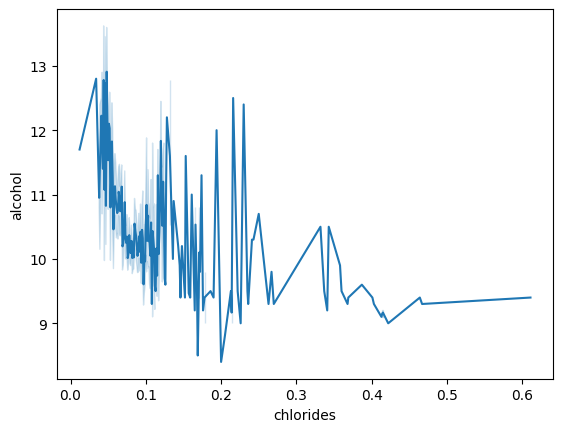

In [60]:
sns.lineplot(x = df.chlorides,y=df.alcohol)

<Axes: xlabel='chlorides', ylabel='quality'>

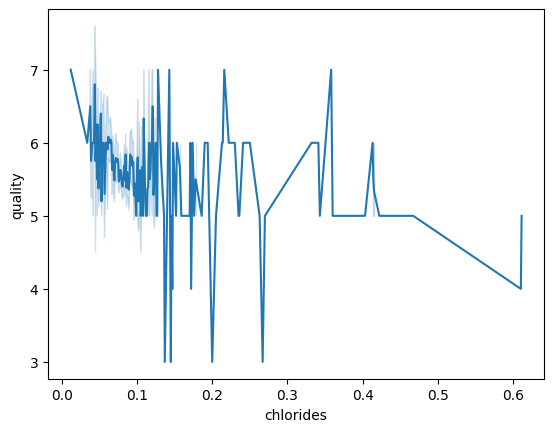

In [61]:
sns.lineplot(x = df.chlorides,y=df.quality)

<Axes: xlabel='density', ylabel='alcohol'>

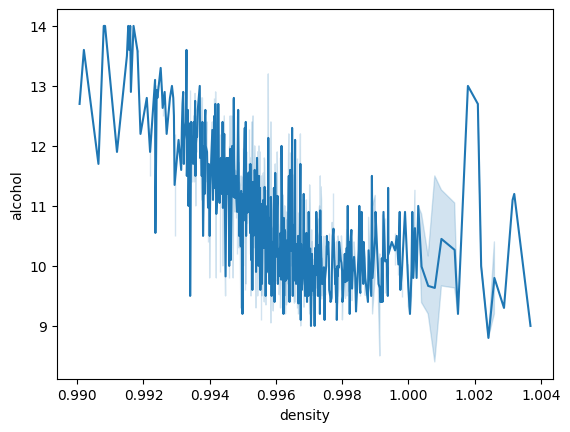

In [62]:
sns.lineplot(x = df.density,y=df.alcohol)

<Axes: xlabel='density', ylabel='quality'>

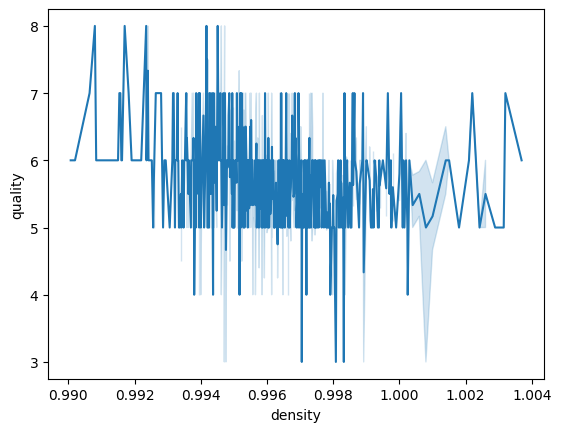

In [63]:
sns.lineplot(x = df.density,y=df.quality)

<Axes: xlabel='density', ylabel='quality'>

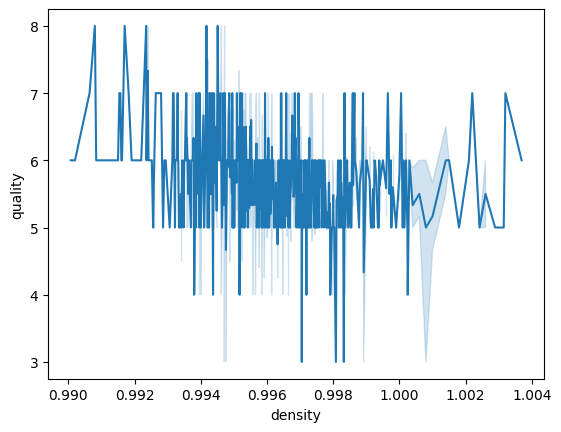

In [64]:
sns.lineplot(x = df.density,y=df.quality)

<Axes: xlabel='total_sulfur_dioxide', ylabel='alcohol'>

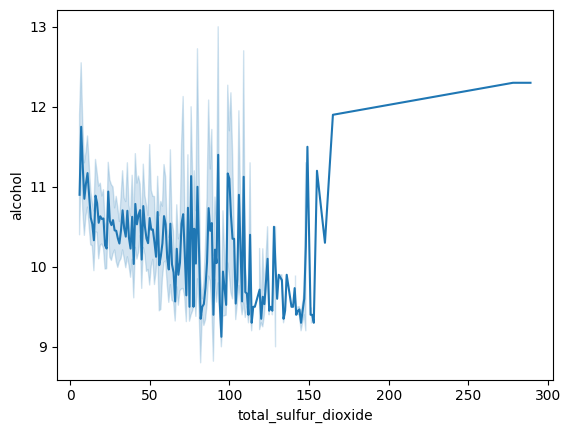

In [65]:
sns.lineplot(x = df.total_sulfur_dioxide,y=df.alcohol)

<Axes: xlabel='total_sulfur_dioxide', ylabel='quality'>

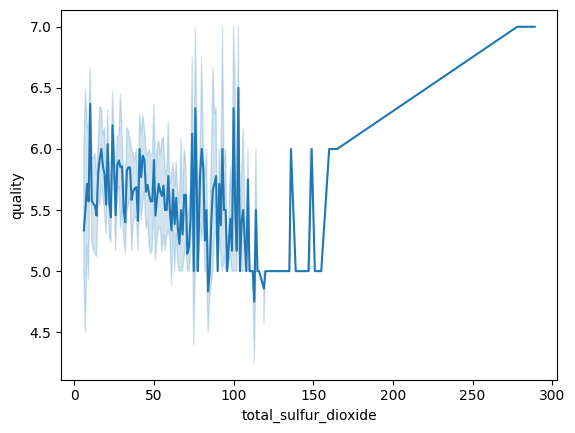

In [66]:
sns.lineplot(x = df.total_sulfur_dioxide,y=df.quality)

<Axes: xlabel='volatile_acidity', ylabel='alcohol'>

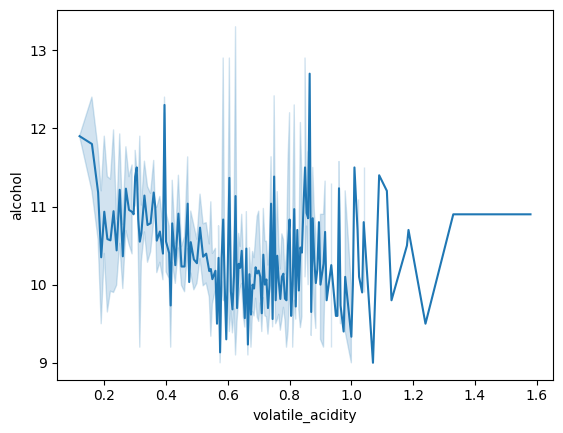

In [68]:
sns.lineplot(x = df.volatile_acidity,y=df.alcohol)

<Axes: xlabel='total_sulfur_dioxide', ylabel='quality'>

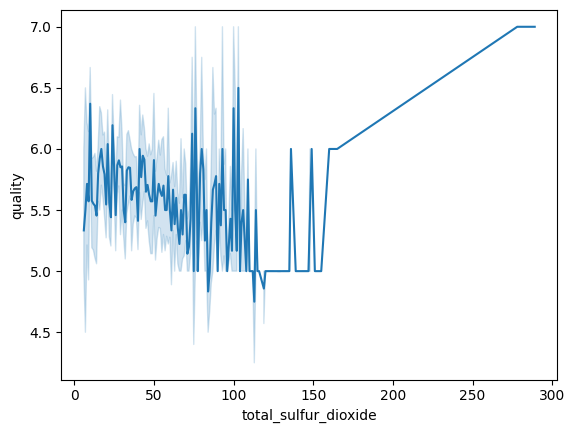

In [69]:
sns.lineplot(x = df.total_sulfur_dioxide,y=df.quality)

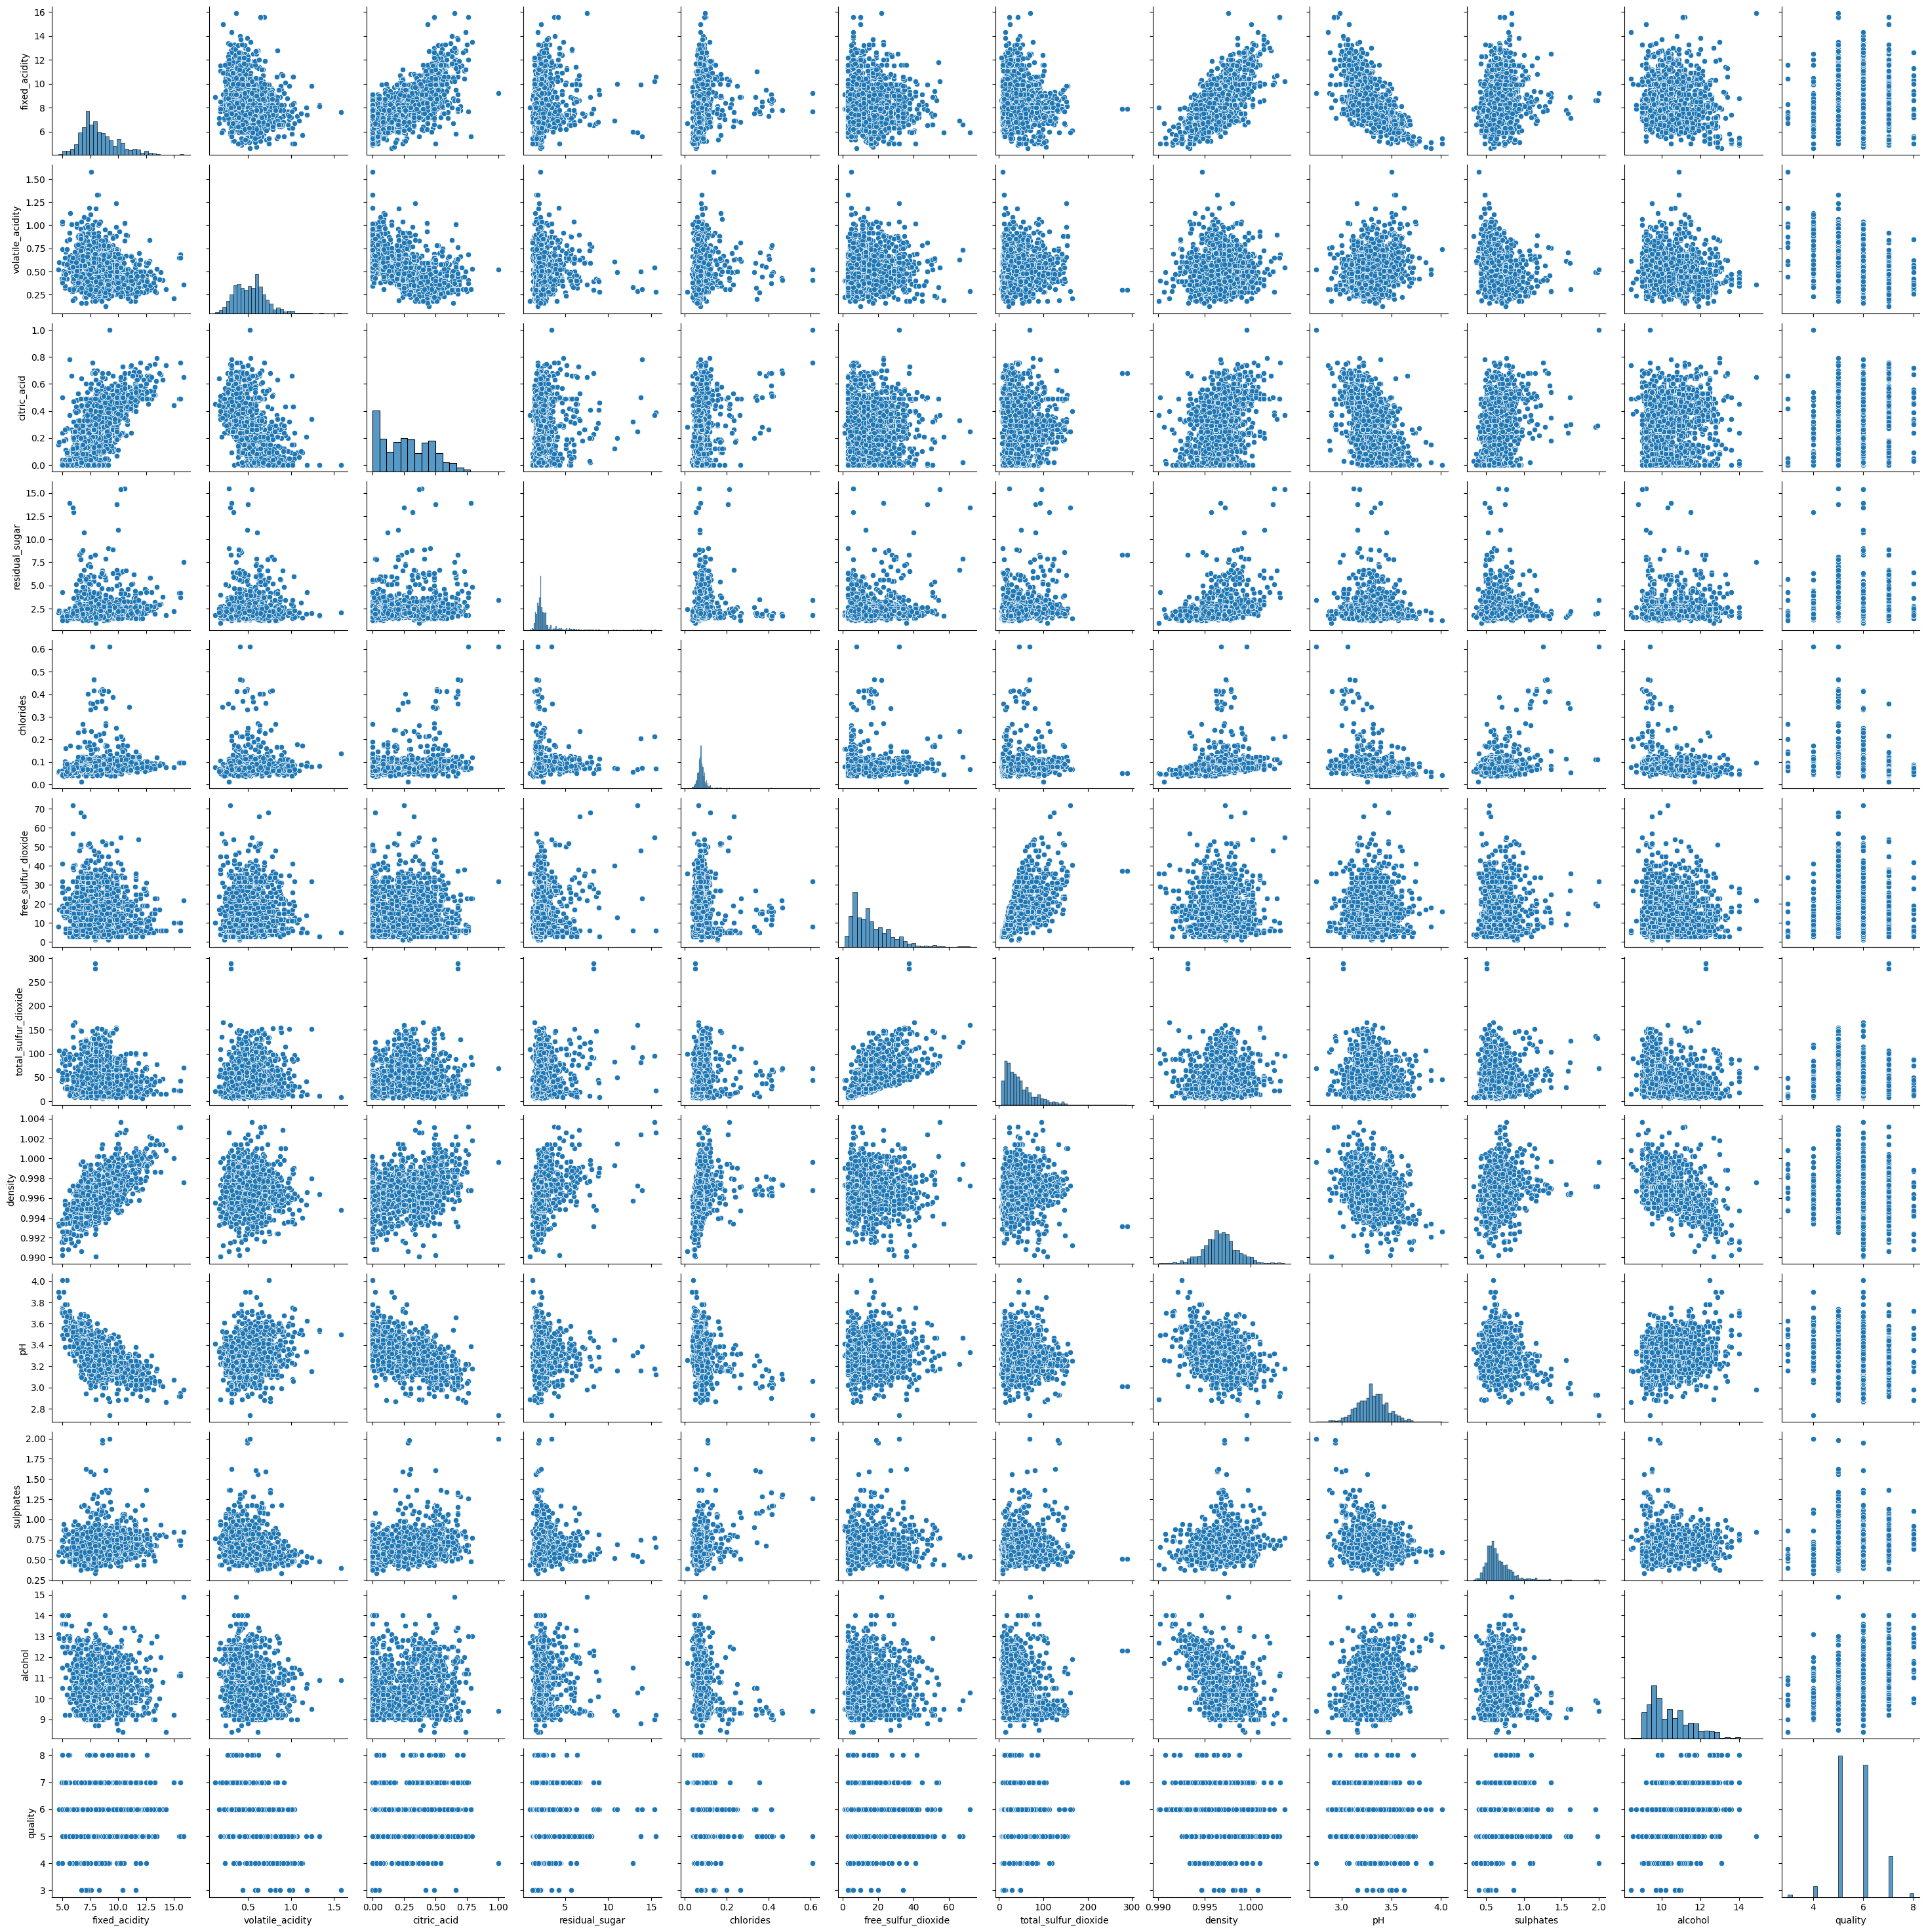

In [70]:
sns.pairplot(df)

In [102]:
df.median()

fixed_acidity            7.90000
volatile_acidity         0.52000
citric_acid              0.26000
residual_sugar           2.20000
chlorides                0.07900
free_sulfur_dioxide     14.00000
total_sulfur_dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.10000
quality                  6.00000
dtype: float64

Text(0.5, 1.0, 'Box Plot of All Columns')

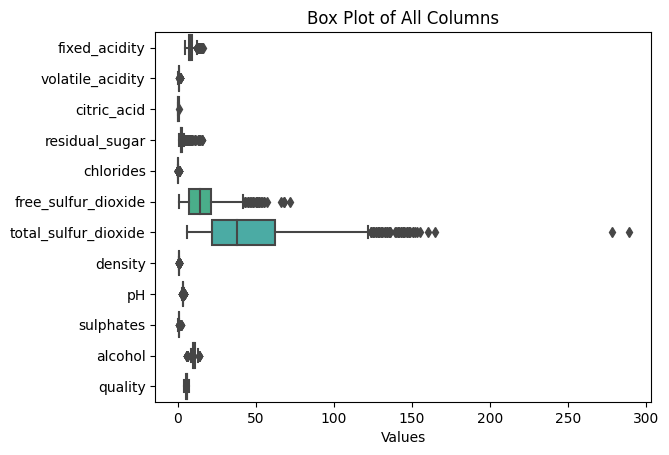

In [108]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [112]:
l1=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
for i in l1:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

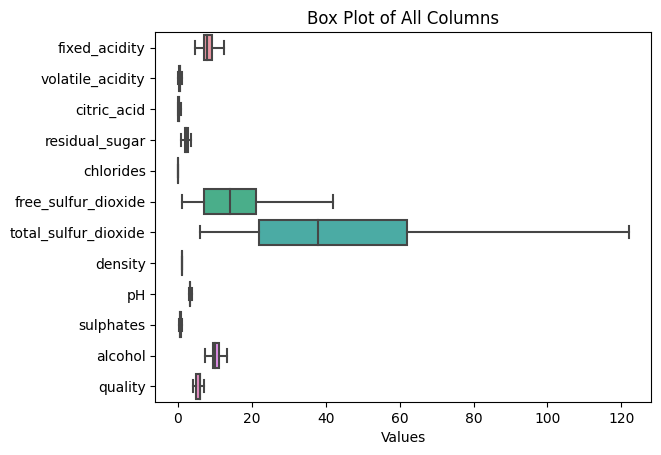

In [114]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

no label encoding is required as there are no labels in this dataset

<Axes: >

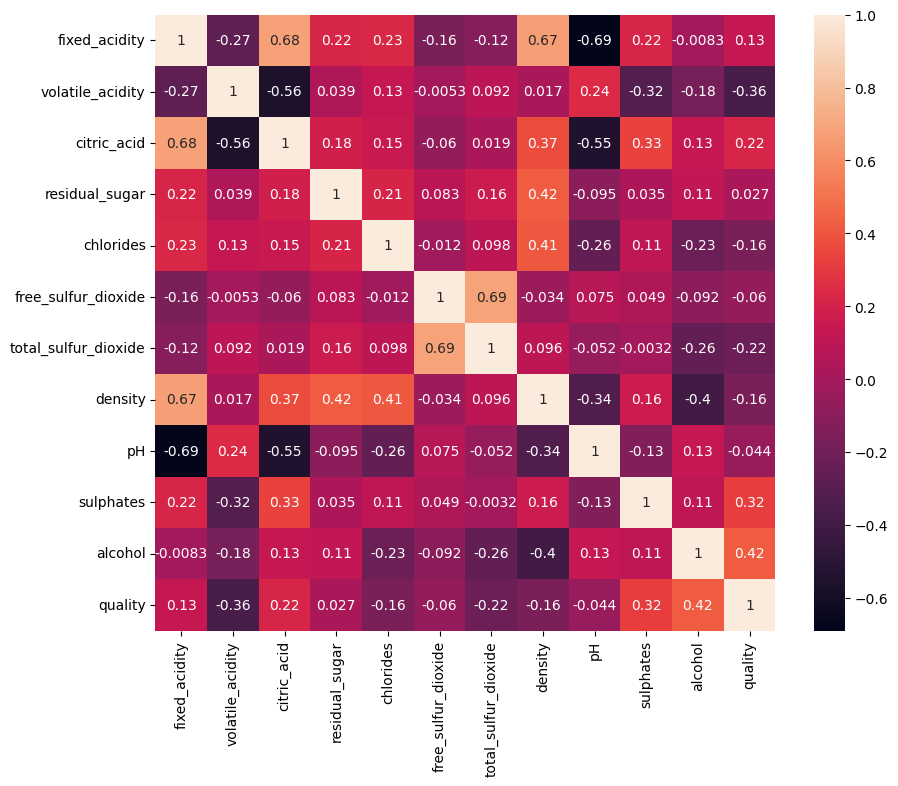

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot =True)

*Task 4:Machine Learning Model building*

In [117]:
X =df.iloc[:,:-1]
X.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [118]:
y =df.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.25,random_state=0)

In [120]:
x_train1.shape

(1199, 11)

In [193]:
x_test1.shape

(400, 11)

*Task 5 : Evaluate the model*

Decision Tree classifier

In [122]:
model1 = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [194]:
model1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [195]:
d_y_predict1 = model1.predict(x_test1)

In [196]:
d_y_predict1

array([6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 4, 5, 6, 7, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 7, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 6, 7, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 7, 6, 6, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [197]:
d_y_predict_train1 = model1.predict(x_train1)

In [127]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [198]:
print('Testing Accuracy = ', accuracy_score(y_test1,d_y_predict1))
print('Training Accuracy = ', accuracy_score(y_train1,d_y_predict_train1))

Testing Accuracy =  0.575
Training Accuracy =  0.5996663886572143


The accuracy for Decision tree is very low

Random forest classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(criterion='entropy')

In [200]:
model2.fit(x_train1,y_train1)

RandomForestClassifier(criterion='entropy')

In [201]:
r_y_predict2 = model2.predict(x_test1)
r_y_predict_train2 = model2.predict(x_train1)

In [202]:
print('Testing Accuracy = ', accuracy_score(y_test1,r_y_predict2))
print('Training Accuracy = ', accuracy_score(y_train1,r_y_predict_train2))

Testing Accuracy =  0.6825
Training Accuracy =  1.0


Hence, the accuracy for random  forest is 70% and above

Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [203]:
model3.fit(x_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [204]:
pred3 = model3.predict(x_test1)

In [205]:
pred3

array([6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 7,
       6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6,

Classification Evaluation

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve

In [206]:
accuracy_score(y_test1,pred3)

0.625

In [207]:
confusion_matrix(y_test1,pred3)

array([[  0,   9,   5,   0],
       [  0, 126,  43,   0],
       [  0,  51, 123,   3],
       [  0,   5,  34,   1]])

In [208]:
pd.crosstab(y_test1,pred3)

col_0      5    6  7
quality             
4          9    5  0
5        126   43  0
6         51  123  3
7          5   34  1

In [209]:
# classification report

print(classification_report(y_test1,pred3))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.66      0.75      0.70       169
           6       0.60      0.69      0.64       177
           7       0.25      0.03      0.05        40

    accuracy                           0.62       400
   macro avg       0.38      0.37      0.35       400
weighted avg       0.57      0.62      0.59       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Ridge and Lasso**

In [146]:
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.361290          0.648045     0.000000        0.363636     0.4500   
1       0.412903          0.849162     0.000000        0.618182     0.7250   
2       0.412903          0.715084     0.043716        0.509091     0.6500   
3       0.851613          0.178771     0.612022        0.363636     0.4375   
4       0.361290          0.648045     0.000000        0.363636     0.4500   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.243902              0.241379  0.621085  0.769737   0.343284   
1             0.585366              0.525862  0.509228  0.361842   0.522388   
2             0.341463              0.413793  0.531600  0.440789   0.477612   
3             0.390244              0.465517  0.643456  0.309211   0.373134   
4             0.243902              0.241379  0.621085  0.769737   0.343284   

    alcohol  
0  0.358333  
1  0.425000  
2  0.425000  
3  0.425000  
4  0.358333

In [147]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=0)

In [148]:
x_train.shape

(1279, 11)

In [149]:
x_test.shape

(320, 11)

In [150]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [151]:
r = Ridge()
l = Lasso()

In [152]:
r.fit(x_train,y_train)

Ridge()

In [153]:
l.fit(x_train,y_train)

Lasso()

In [210]:
pred4 =r.predict(x_test)

In [211]:
pred4

array([5.82725611, 5.18047169, 6.59369605, 5.24410556, 5.97080646,
       4.99966204, 5.44676483, 6.05973903, 5.00321051, 4.9974979 ,
       5.23583443, 5.33648548, 5.67042679, 5.24090733, 5.58083122,
       6.37966534, 6.72015337, 5.57792762, 5.9224638 , 5.24447125,
       6.34000627, 5.26874261, 5.61896392, 5.71107642, 5.44335058,
       5.04479063, 5.22061584, 6.38719075, 5.35412238, 6.25446057,
       5.92953369, 5.72240135, 5.59803204, 5.35085826, 5.69502386,
       6.00875645, 5.22004306, 5.78113483, 6.36899886, 5.74836372,
       5.37401071, 6.01800595, 5.4475332 , 6.51305689, 5.86631431,
       4.89065367, 5.49802842, 5.95231809, 5.49246123, 6.01177769,
       5.32708734, 5.19230056, 5.59082025, 6.17825821, 5.73814464,
       5.30762121, 5.18158527, 5.38484137, 6.44691957, 5.524064  ,
       5.31077419, 5.75311911, 5.93644084, 6.10149292, 5.1451556 ,
       6.13094964, 5.37747431, 5.8289261 , 6.23787531, 5.72396525,
       5.42826843, 5.78689583, 5.11424492, 5.60629875, 5.57765

In [212]:
pred4_train = r.predict(x_train)

In [213]:
pred4_train

array([5.3898636 , 5.89926905, 6.16303367, ..., 5.31531748, 6.17825821,
       4.66440705])

In [214]:
pred5 =l.predict(x_test)

In [215]:
pred5

array([5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190774,
       5.64190774, 5.64190774, 5.64190774, 5.64190774, 5.64190

In [216]:
pred5_train = l.predict(x_train)
pred5_train

array([5.64190774, 5.64190774, 5.64190774, ..., 5.64190774, 5.64190774,
       5.64190774])

In [218]:
qualityy =pd.DataFrame({'Actual_Quality':y_test, 'Ridge_pred':pred4,'Lasso_pred':pred5})
qualityy.head(10)

Actual_Quality  Ridge_pred  Lasso_pred
1109               6    5.827256    5.641908
1032               5    5.180472    5.641908
1002               7    6.593696    5.641908
487                6    5.244106    5.641908
979                5    5.970806    5.641908
1054               6    4.999662    5.641908
542                5    5.446765    5.641908
853                6    6.059739    5.641908
1189               4    5.003211    5.641908
412                5    4.997498    5.641908

In [219]:
from sklearn import metrics

In [220]:
# r2 score
print(metrics.r2_score(y_test,pred4))
print(metrics.r2_score(y_test,pred5))


0.29077157070746895
-0.004844610350212442


In [221]:
# MSE
print(metrics.mean_squared_error(y_test,pred4))
print(metrics.mean_squared_error(y_test,pred5))

0.33951540628828003
0.4810301054625724


In [222]:
# RMSE

print(np.sqrt(metrics.mean_squared_error(y_test,pred4)))
print(np.sqrt(metrics.mean_squared_error(y_test,pred5)))

0.5826795056360572
0.693563339185811


**Linear Regression**

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
model4 = LinearRegression()

In [168]:
model4.fit(X,y)

LinearRegression()

In [223]:
model4.fit(x_train1,y_train1)

LinearRegression()

In [224]:
y_pred6 =model4.predict(x_test)
y_pred6

array([32.29619971, 28.63540745, 66.38035133, 32.96187314, 46.86764339,
       40.13179436, 49.87120421, 51.21154126, 53.95009776, 49.26448379,
       48.60819475, 26.17576157, 27.46054025, 84.1803575 , 69.20854138,
       68.85214321, 83.37967568, 37.68046461, 88.14293964, 41.10435826,
       87.06645561, 39.28469009, 62.76946979, 60.0451846 , 41.79790268,
       60.1605442 , 37.26439405, 65.7576312 , 45.66216684, 97.40218492,
       37.51734295, 36.07127173, 64.45674634, 38.36274051, 65.03758715,
       16.23282231, 46.75620895, 28.49028134, 82.61066355, 65.16081313,
       35.01211522, 47.53899001, 97.11011186, 28.9573775 , 59.60677647,
       48.45054419, 71.39323531, 52.4441125 , 43.40248527, 67.12610814,
       58.64823004, 58.99832464, 32.64039326,  1.35703636, 26.86708559,
       66.43082098, 50.38637384, 41.26025294, 52.87550008, 37.93102471,
       30.46981754, 52.02827139, 73.8890355 , 60.85517369, 37.16347595,
       73.65876565, 61.82816906,  0.90291452, 45.08094594, 10.64

In [227]:
qualityyy= pd.DataFrame({'Actual_Quality':y_test,'Predicted_Quality':y_pred})
qualityyy.sort_values(by=['Actual_Quality'])


Actual_Quality  Predicted_Quality
927                4           5.056079
1235               4           5.699703
813                4           5.947474
1124               4           5.832873
170                4           4.721665
...              ...                ...
1440               7           6.142350
1408               7           6.872034
638                7           5.220950
364                7           5.593371
913                7           6.337755

[320 rows x 2 columns]

<Axes: xlabel='Actual_Quality', ylabel='Predicted_Quality'>

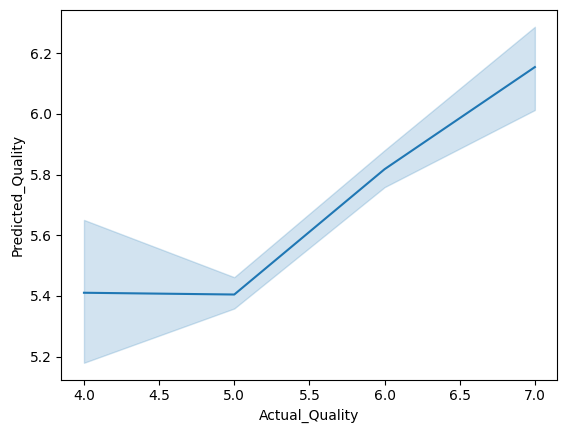

In [180]:
sns.lineplot(x = qualityyy.Actual_Quality,y=qualityyy.Predicted_Quality)

In [186]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [229]:
#mean absolute error
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred6))

Mean Absolute Error:  43.43174672301922


In [232]:
# Mean squared error
print("Mean squared error:",mean_squared_error(y_test,y_pred) )

Mean squared error: 0.3406885198885119


In [231]:
#r2 score
print("r2 score:",r2_score(y_test,y_pred))

r2 score: 0.28832100292567076


*Task 6:Test with random observation*

In [191]:
sample_check=[[6.5, 0.6, 0.3, 2.2, 0.07, 15.0, 40.0, 0.996, 3.4, 0.6, 9.5],
             [8.0, 0.4, 0.4, 2.8, 0.085, 22.0, 55.0, 0.998, 3.2, 0.55, 11.2],
             [6.8, 0.55, 0.15, 2.4, 0.075, 25.0, 62.0, 0.9962, 3.1, 0.75, 9.0],
             [7.5, 0.45, 0.35, 2.5, 0.09, 30.0, 70.0, 0.9978, 3.5, 0.6, 11.5],
             [7.0, 0.5, 0.2, 2.5, 0.08, 20.0, 60.0, 0.997, 3.3, 0.7, 10.0]
             ]

for i in sample_check:
    x=model2.predict([i])
    if(x>=6):
        print(x, "--> Good" )
    elif(x<6):
        print(x, "--> Not Good")

[5] --> Not Good
[6] --> Good
[5] --> Not Good
[6] --> Good
[6] --> Good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
